In [156]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
#plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)
import missingno as msno


In [2]:
df1 = pd. read_csv('winemag-data_first150k.csv')
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
df1.shape

(150930, 11)

In [4]:
df = pd. read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.shape

(129971, 14)

From the above print we can say that df1 is a subset of df. So we will continue with df and discard df1

In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Let's drop ' column Unnamed: 0 first. It is of no use.

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


Let's check how many type of wines do we have'

In [9]:
df['title'].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)          11
Korbel NV Brut Sparkling (California)                            9
Segura Viudas NV Extra Dry Sparkling (Cava)                      8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)             7
Ruinart NV Brut Rosé  (Champagne)                                7
                                                                ..
DeMorgenzon 2014 Reserve Chenin Blanc (Stellenbosch)             1
Lynmar 2015 La Sereinite Chardonnay (Russian River Valley)       1
MacPhail 2011 Gap's Crown Vineyard Pinot Noir (Sonoma Coast)     1
Guyomar 2011 Laity Red (Paso Robles)                             1
Terre Rouge 2010 L'Autre G-S-M (Sierra Foothills)                1
Name: title, Length: 118840, dtype: int64

In [10]:
df['title'].nunique()

118840

In [11]:
df['variety'].nunique()

707

In [12]:
df['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Schwartzriesling                1
Athiri                          1
Cococciola                      1
Tsapournakos                    1
Pinot Blanc-Pinot Noir          1
Name: variety, Length: 707, dtype: int64

In [13]:
var=pd.DataFrame(df['variety'].value_counts()).reset_index()
var.columns=['Variety','count']
var[var['count']>10]

,Variety,count
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
...,...,...
281,Cabernet,11
282,Tinta Roriz,11
283,Tannat-Merlot,11
284,Merlot-Cabernet,11


From above we can surely say that 'title' and 'variety' is not something that we can predict here. Let's check further.'

In [14]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [15]:
df['province'].value_counts()

California       36247
Washington        8639
Bordeaux          5941
Tuscany           5897
Oregon            5373
                 ...  
Vinho da Mesa        1
Muzla                1
Hawaii               1
Kathikas             1
Dolenjska            1
Name: province, Length: 425, dtype: int64

In [16]:
prov=pd.DataFrame(df['province'].value_counts()).reset_index()
prov.columns=['Province','No_count']
prov[prov['No_count']>10]

,Province,No_count
0,California,36247
1,Washington,8639
2,Bordeaux,5941
3,Tuscany,5897
4,Oregon,5373
...,...,...
220,North Dalmatia,12
221,Germany,12
222,Wairau Valley,11
223,Montevideo,11


In [17]:
df['region_1'].value_counts()

Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
                        ... 
Trentino Superiore         1
Colli del Limbara          1
Rosso di Cerignola         1
Catamarca                  1
Kentucky                   1
Name: region_1, Length: 1229, dtype: int64

In [18]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# Missing values

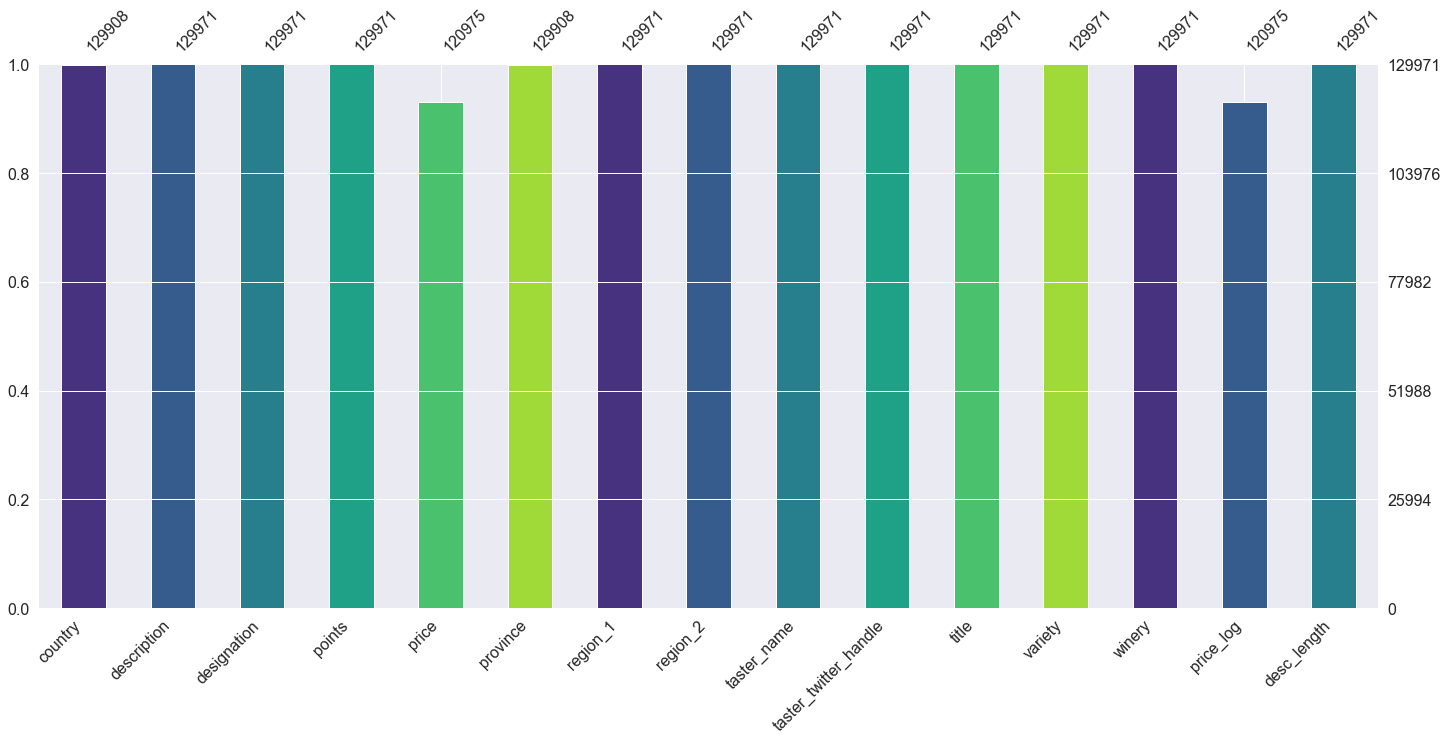

In [158]:
msno.bar(df,color= sns.color_palette('viridis'))

# COUNTRY

In [19]:
df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [20]:
df['country'].nunique()

43

Thus there is data for 43 country's for which wine tasting has been done.If we see the values then US , France and Italy are the countries which has maximum no. of samples. 

In [21]:
con=pd.DataFrame(df['country'].value_counts()).reset_index()
con.columns=['Country','Country_count']
con1=con.head(10)
con1

,Country,Country_count
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691
5,Chile,4472
6,Argentina,3800
7,Austria,3345
8,Australia,2329
9,Germany,2165


In [159]:
cnt = df['country'].value_counts().to_frame()[0:20]

In [160]:
cnt

,country
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329
Germany,2165


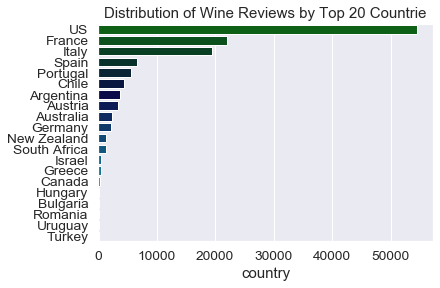

In [161]:
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countrie');

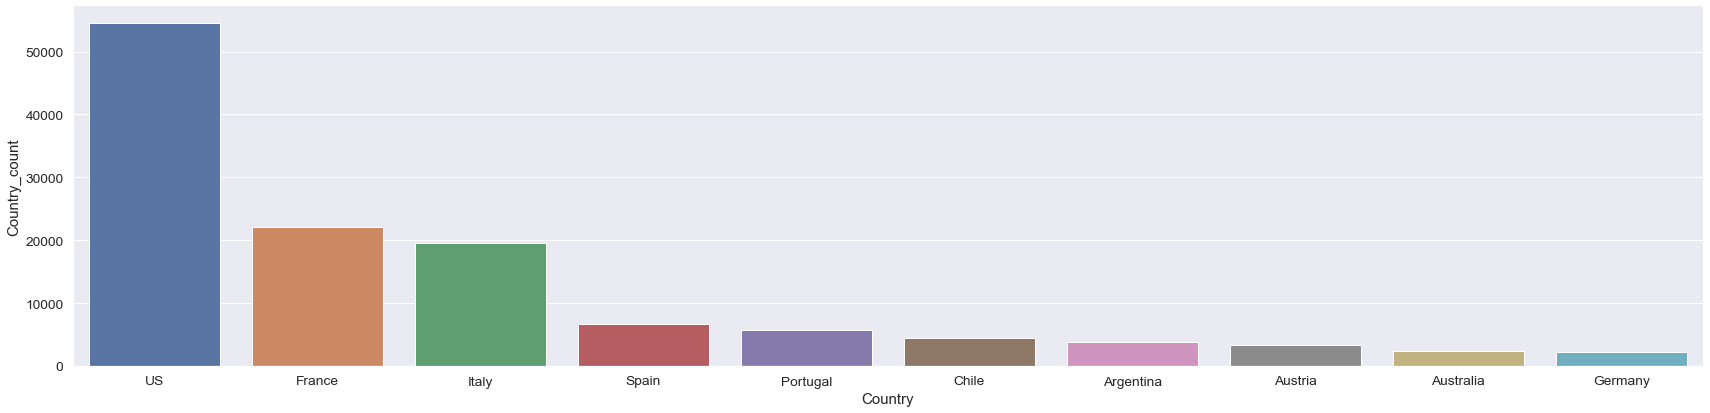

In [22]:
sns.catplot(x='Country',y='Country_count',data=con1,kind='bar',height=6, aspect=4)

Thus there is data for 43 country's for which wine tasting has been done.If we see the values then US , France and Italy are the countries which has 
maximum no. of samples. 

# Average rating of wine by country wise

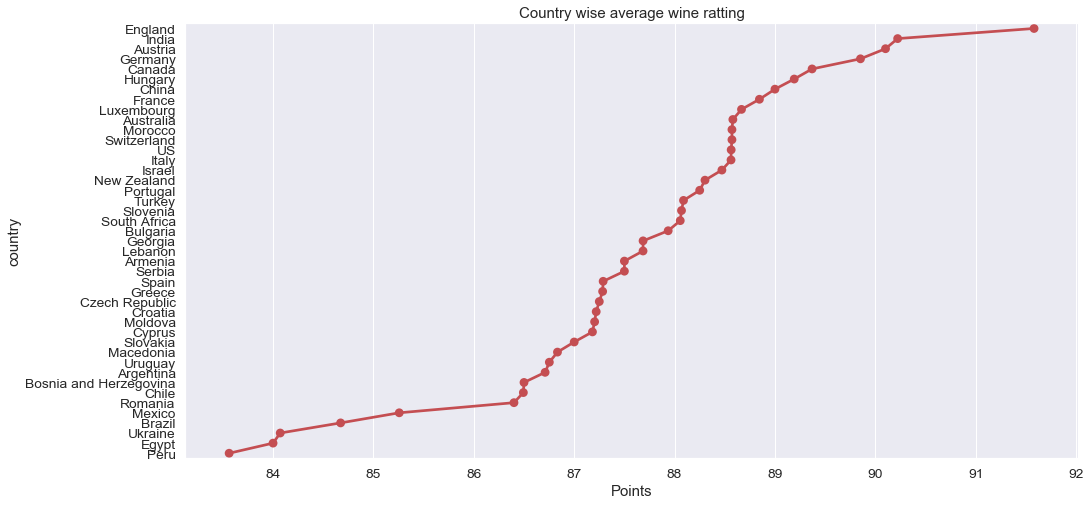

In [171]:
cnt =df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

The average rating of wine for England is top in the table.

The coutries like Austria,Germany, India, France are top quality wine producing country.

South korea, Montenegro produces least quality wine.

# Country wise Highest and Least rated wine

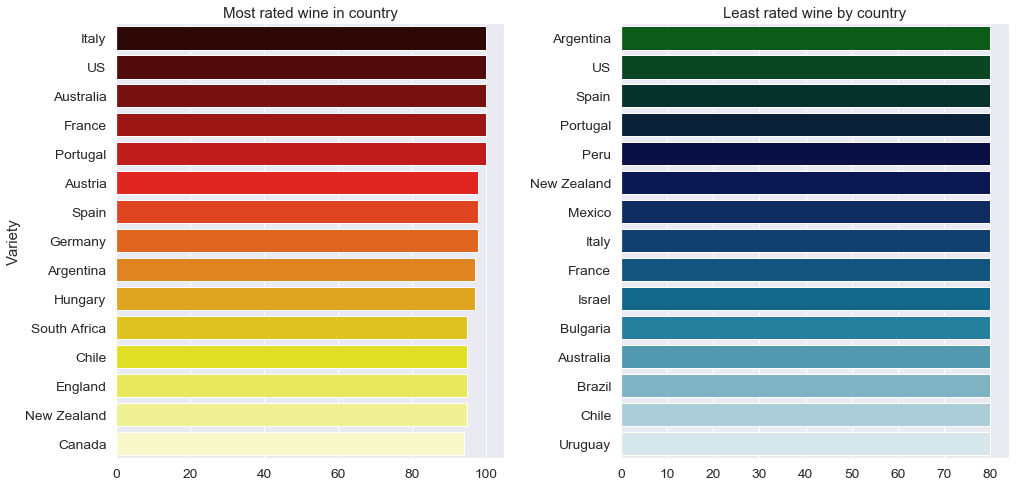

In [172]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

The rating of wine is varies from 0 to 100, but least rating is 80.

The wine produced in France, Australia, Portugal, Italy, US receives top rating.

The wine produced in Urugay, South Africa, Portugal reveices least rating.


# description

A  few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.

In [23]:
df['description']

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [24]:
df['description']=df['description'].astype(str)
describe_corpus=' '.join(df['description'])

In [25]:
df['description']

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

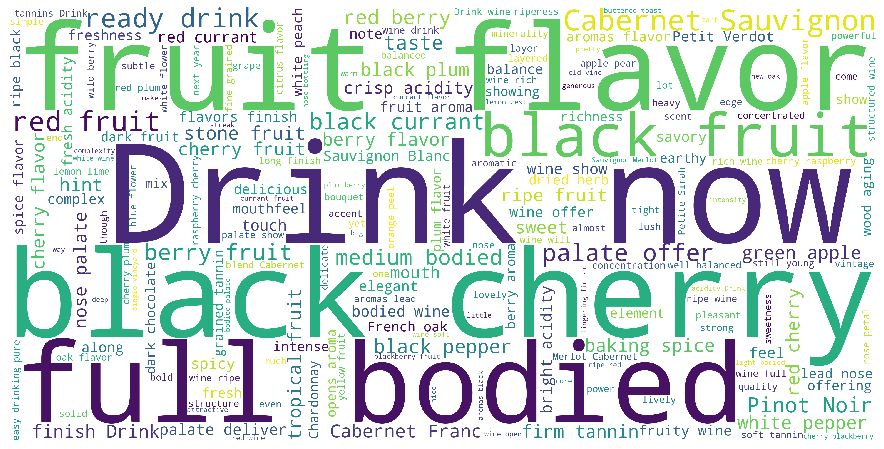

In [26]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(describe_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


Most focussed word in the describtion are fruit,flavor, drink,black cherry . black fruit etc ..

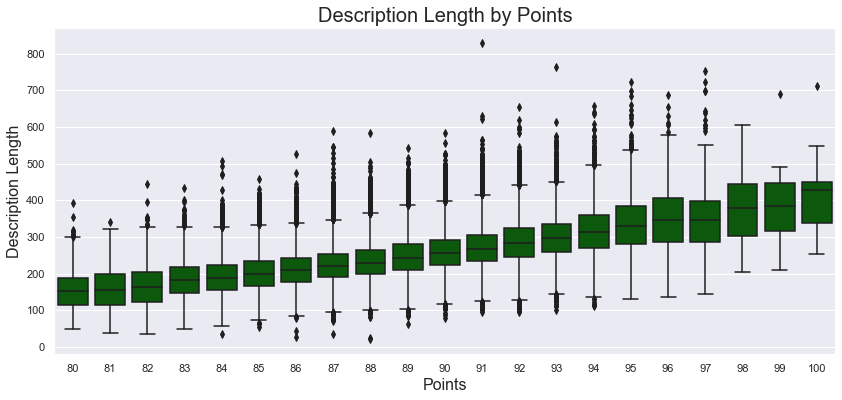

In [155]:
df = df.assign(desc_length = df['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df,
                color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

This proves that longer the length of description , higher will be the points

In [27]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# designation

designation :The vineyard within the winery where the grapes that made the wine are from

In [28]:
df['designation']=df['designation'].astype(str)

In [29]:
df['designation'].isnull().sum()

0

In [30]:
df[df['designation']!='nan']['designation'].value_counts()

Reserve                      2009
Estate                       1322
Reserva                      1259
Riserva                       698
Estate Grown                  621
                             ... 
Handal Family Vineyard          1
Capricho Val de Paxariñas       1
Reserva Porto Lote no 12        1
Domaine Hamelin Marly           1
Torretta                        1
Name: designation, Length: 37979, dtype: int64

In [31]:
desig=(df[df['designation']!='nan']['designation'].value_counts()).reset_index()
desig.columns=['designation','count']
des1=desig.head(10)
des1

,designation,count
0,Reserve,2009
1,Estate,1322
2,Reserva,1259
3,Riserva,698
4,Estate Grown,621
5,Brut,513
6,Dry,413
7,Barrel sample,375
8,Crianza,343
9,Estate Bottled,342


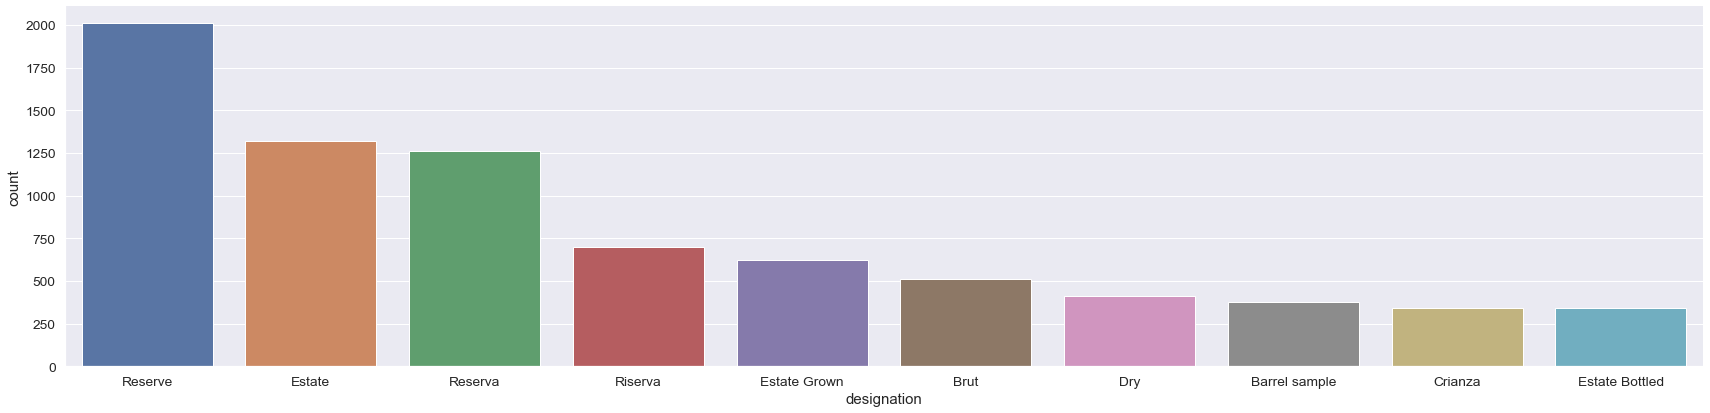

In [32]:
sns.catplot(x='designation',y='count',data=des1,kind='bar',height=6,aspect=4)

Lets find out if the vineyards are related to the country. Means a specific type of vineyard are present in some specific countries

In [33]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

RESERVE

In [34]:
df[(df['designation'].notnull())&(df['designation']=='Reserve')]['country'].unique()

array(['Chile', 'South Africa', 'US', 'Argentina', 'Austria',
       'New Zealand', 'Australia', 'France', 'Greece', 'Israel', 'Canada',
       'Bulgaria', 'Turkey', 'Uruguay', 'Italy', 'Moldova', 'Romania',
       'Ukraine', nan], dtype=object)

Estate

In [35]:
df[(df['designation'].notnull())&(df['designation']=='Estate')]['country'].unique()

array(['Chile', 'US', 'Argentina', 'Israel', 'New Zealand',
       'South Africa', 'Hungary', 'Australia', 'Greece', 'Portugal',
       'Canada', 'Germany', nan, 'France'], dtype=object)

Thus we can say that Vineyard name are Global. It is not restricted to a specific country.

# POINTS

The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

In [36]:
df['points'].unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80, 100,
        98,  97,  96,  95,  93,  94,  84,  99], dtype=int64)

In [37]:
df['points'].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [38]:
df['points'].nunique()

21

Thus the points given for wines range from 80 to 100 and all the 21 points are present 

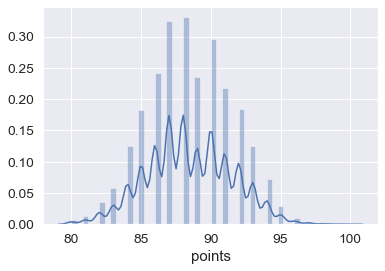

In [39]:
sns.distplot(df['points'])

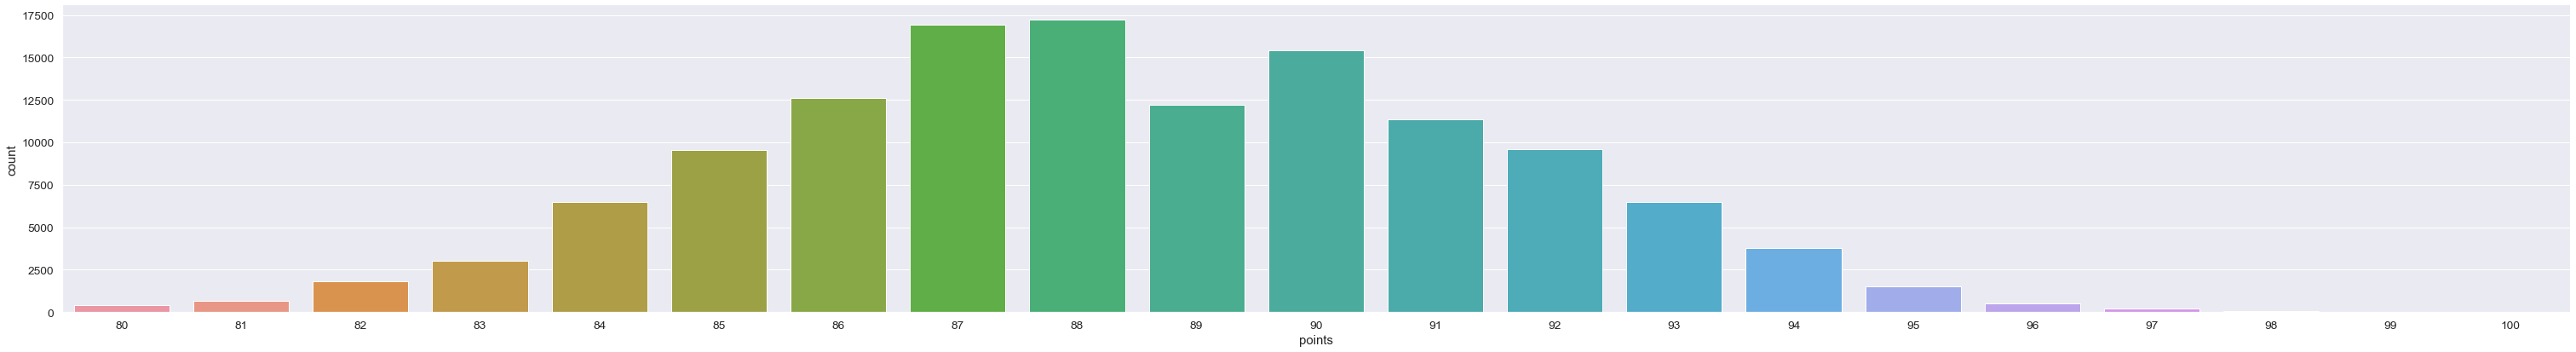

In [40]:

sns.catplot(x='points',kind='count',data=df,height=6, aspect=7)

Text(0.5, 1.0, 'Points Distribuition')

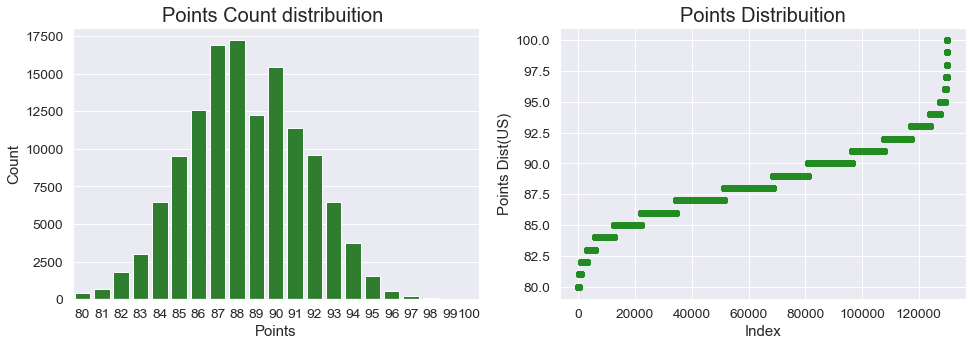

In [41]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font


Thus the most points which are given are  85 to 92 mark with 88 the highest

Lets check if we can find any resemblance in the data based on the points given. For this we will choose first for point 100. 

In [42]:
df[df['points']==100]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,US,Tasted in a flight of great and famous Napa wi...,nan,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58352,France,"This is a magnificently solid wine, initially ...",nan,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


From the data what we can find common is Roger Voss(taster) , he is the person who has given most number of 100. May be he is
linient scorer

In [43]:
df[df['taster_name']=='Roger Voss']['points'].unique()

array([ 87,  86,  85,  88,  91,  90,  89,  92,  82,  96,  95,  93,  94,
        84,  83,  98,  97,  80,  81, 100,  99], dtype=int64)

In [44]:
df[df['taster_name']=='Roger Voss']['points'].value_counts()

88     3495
87     3060
90     2855
86     2445
91     2330
85     2218
89     2183
92     1940
93     1522
84     1333
94      879
95      433
83      382
96      148
82      123
97       81
81       33
98       25
100      10
99       10
80        9
Name: points, dtype: int64

So we can see Roger has given points all over the range. Nothing fruitful from this. Let's proceed further and check

In [45]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# PRICE

In [46]:
df['price']=df['price'].astype('float64')

In [47]:
df[df['price'].notnull()]['price']

1         15.0
2         14.0
3         13.0
4         65.0
5         15.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 120975, dtype: float64

In [48]:
df['price'].isnull().sum()

8996

In [49]:
df[df['price'].notnull()]['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [50]:
df[df['price'].notnull()]['price'].quantile(0.999)

468.0260000000126

In [51]:
df[df['price'].notnull()]['price'].sort_values(ascending=False)

80290     3300.0
15840     2500.0
98380     2500.0
120391    2013.0
113564    2000.0
           ...  
61768        4.0
31530        4.0
59507        4.0
112919       4.0
20484        4.0
Name: price, Length: 120975, dtype: float64

In [52]:
df.iloc[80290]

country                                                             France
description              This ripe wine shows plenty of blackberry frui...
designation                                                            nan
points                                                                  88
price                                                                 3300
province                                                          Bordeaux
region_1                                                             Médoc
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                                 Château les Ormes Sorbet 2013  Médoc
variety                                           Bordeaux-style Red Blend
winery                                            Château les Ormes Sorbet
Name: 80290, dtype: objec

In [53]:
df.iloc[15840]

country                                                             France
description              The wine is a velvet glove in an iron fist. Th...
designation                                                            nan
points                                                                  96
price                                                                 2500
province                                                          Bordeaux
region_1                                                           Pomerol
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                                         Château Pétrus 2014  Pomerol
variety                                           Bordeaux-style Red Blend
winery                                                      Château Pétrus
Name: 15840, dtype: objec

So the higher price are not outliers ,as on checking the prices of this wines online it seems these wines are expensive. Let move forward and check the distribution 

In [54]:
df[df['price'].notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",nan,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,nan,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",nan,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


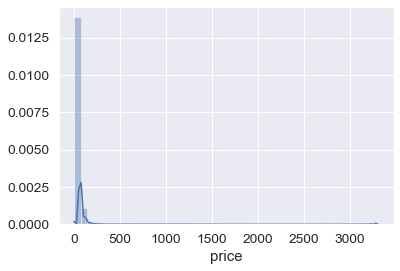

In [55]:
sns.distplot(df[df['price'].notnull()]['price'])

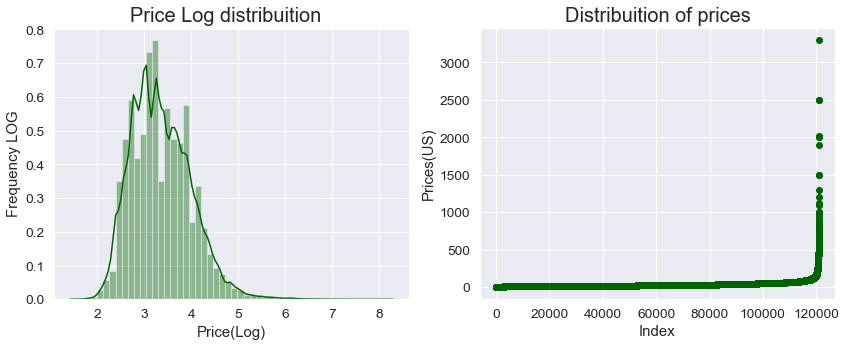

In [56]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

In [57]:
df[df['price'].notnull()]['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

So most of the price are in the range of 0 to 500. This is also evdient from the fact that mean is 35 , 0.999 percentile is 468.
So there are only few values above 500. So lets check the distribution within 500.

In [58]:
df[(df['price'].notnull())&(df['price']>500)].shape

(91, 13)

Only for 91 inputs price is above 500. Let's check the distribution now.

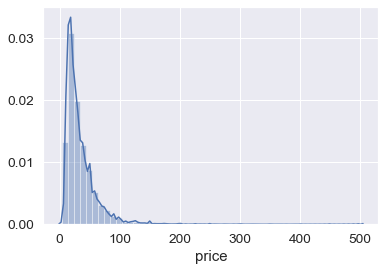

In [59]:
sns.distplot(df[(df['price'].notnull())&(df['price']<500)]['price'])

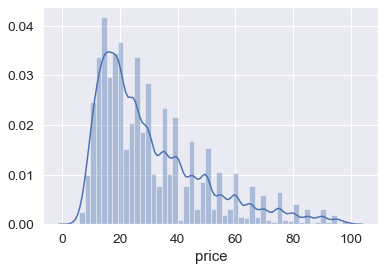

In [60]:
sns.distplot(df[(df['price'].notnull())&(df['price']<100)]['price'])

In [61]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

I think price should be realted with points, high points means high price. Lets check that.

In [62]:
df_500=df[(df['price'].notnull())&(df['price']<500)]

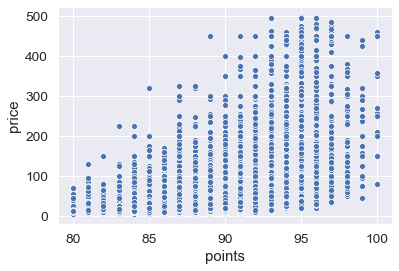

In [63]:
sns.scatterplot(x='points',y='price',data=df_500)

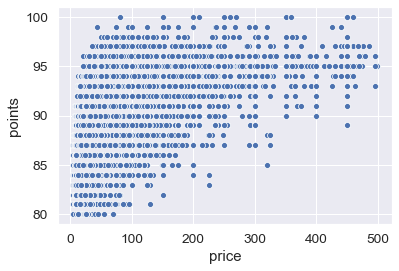

In [64]:
sns.scatterplot(y='points',x='price',data=df_500)

So from this plot we can observed that with increase in points , price generally increases. For example, for wine with points less than 85, the price is around 100 dollars. And for point 95, price has reached 500 dollars.

Lets play with the price and point in some more details.

Check the distribution of price based on country, Will understand if wine from a specific country is more expensive than other country

In [65]:
con1

,Country,Country_count
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691
5,Chile,4472
6,Argentina,3800
7,Austria,3345
8,Australia,2329
9,Germany,2165


In [66]:
df_price=df[(df['country']=='US')|(df['country']=='Italy')|(df['country']=='France')|(df['country']=='Spain')|(df['country']=='Portugal')|(df['country']=='Chile')|(df['country']=='Argentina')|(df['country']=='Austria')|(df['country']=='Australia')|(df['country']=='Germany')]

In [67]:
df_new=df_price[(df_price['price'].notnull())&(df_price['price']<500)]

In [68]:
df_new['price'].describe()

count    115684.000000
mean         35.069370
std          31.631804
min           4.000000
25%          17.000000
50%          26.000000
75%          43.000000
max         499.000000
Name: price, dtype: float64

In [69]:
df_new['country'].nunique()

10

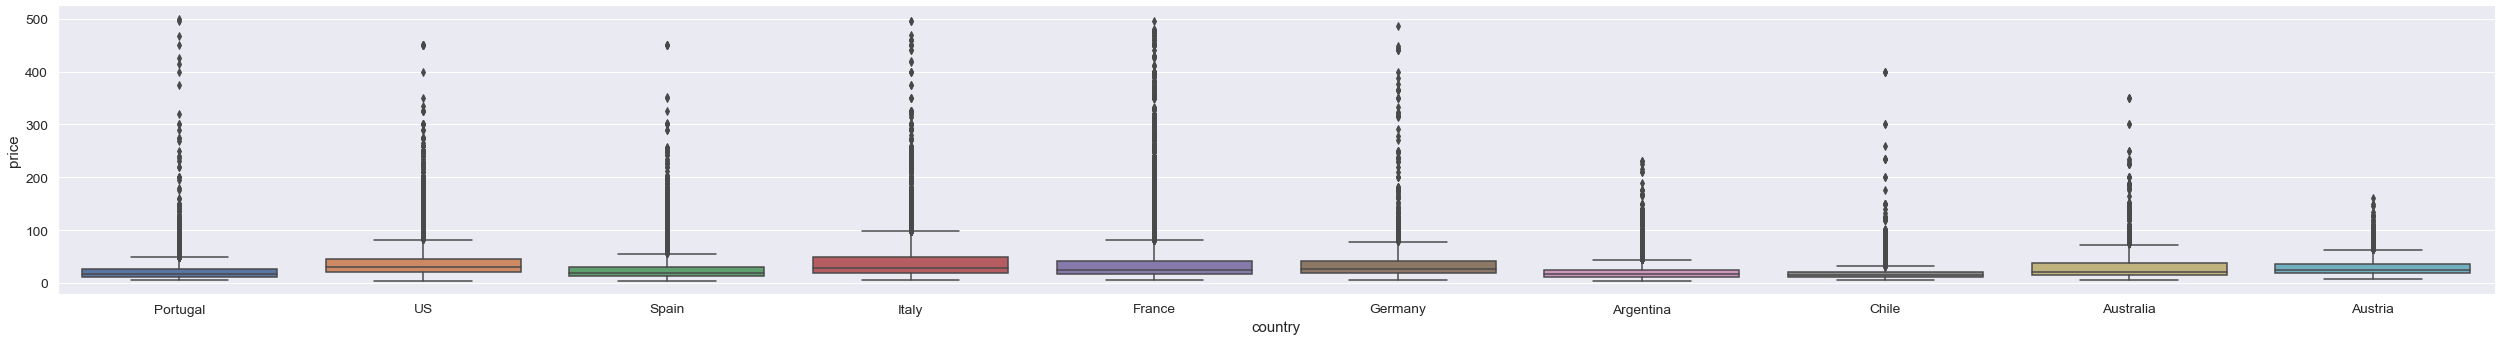

In [70]:
sns.catplot(x='country',y='price',kind='box',data=df_new,aspect=7,height=5)

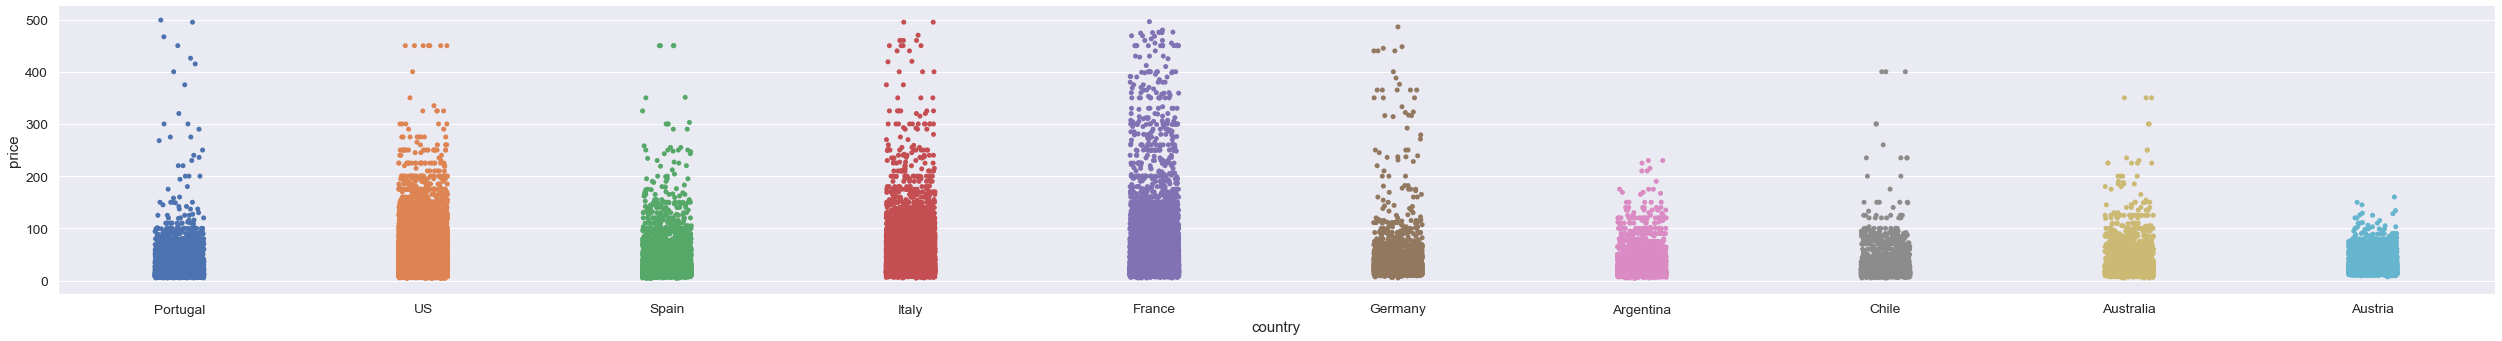

In [71]:
sns.catplot(x='country',y='price',kind='strip',data=df_new,aspect=7,height=5)

So from above we can say that French wines followed by Italy are bit more expensive than other countries.

Lets check Top 10 expensive wines.

In [72]:
df.sort_values(by='price',ascending=False).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,nan,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,The wine is a velvet glove in an iron fist. Th...,nan,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,"A superb wine from a great year, this is power...",nan,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
113564,France,"A wonderfully complete wine, with all the elem...",nan,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
65352,France,This extravagantly perfumed wine has great jui...,nan,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
1558,France,"A massive wine for Margaux, packed with tannin...",nan,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
111753,France,"Almost black in color, this stunning wine is g...",nan,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,nan,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
1575,France,"The purest Cabernet Sauvignon fruit, with dark...",nan,96,1300.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild


Thus 10 out of 9 expensive wines are French wines and most of them belongs to Bordeaux province and Roger is the lucky guy who got to taste all the French expensive wines

In [73]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# PROVINCE

In [166]:
import squarify

Number of province: 425


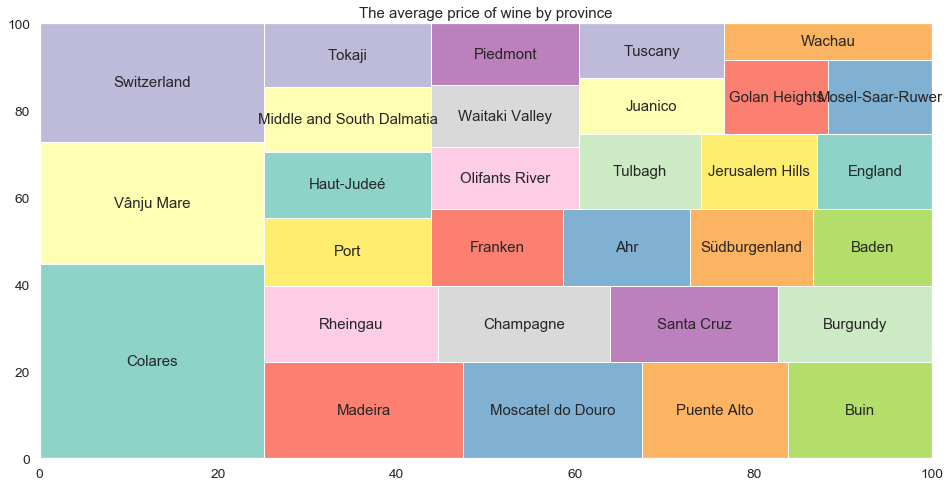

In [168]:
print('Number of province:',df['province'].nunique())
cnt = df.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');

In [169]:
cnt

,price
province,
Colares,262.500000
Vânju Mare,166.000000
Switzerland,160.000000
Madeira,115.181818
Moscatel do Douro,103.200000
Puente Alto,84.500000
Buin,83.625000
Rheingau,79.853896
Champagne,79.461316


The average price of wine in 'Switzerland' is highest.


# region_1, region_2

In [74]:
df['region_1']=df['region_1'].astype(str)

In [75]:
df['region_1']=df['region_1'].replace('nan','No_Value')

In [76]:
df['region_1']=df['region_1'].astype(str)

In [77]:
df[df['region_1']!='No_Value']['region_1']

0                        Etna
2           Willamette Valley
3         Lake Michigan Shore
4           Willamette Valley
5                     Navarra
                 ...         
129965                 Alsace
129967                 Oregon
129968                 Alsace
129969                 Alsace
129970                 Alsace
Name: region_1, Length: 108724, dtype: object

In [78]:
df['region_1']

0                        Etna
1                    No_Value
2           Willamette Valley
3         Lake Michigan Shore
4           Willamette Valley
                 ...         
129966               No_Value
129967                 Oregon
129968                 Alsace
129969                 Alsace
129970                 Alsace
Name: region_1, Length: 129971, dtype: object

Thus there are 20K points or we can say 20K province for which region_1 is not provided.

In [79]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

As we were discussing that France and Italy has most expensive wines, Let's see if any particular province and region from France and Italy produces the expensive wines. 

In [80]:
df_fr_It=df[(df['country']=='France')|(df['country']=='Italy')]

In [81]:
df_fr_It[(df_fr_It['country']=='France')]['province'].value_counts()

Bordeaux                5941
Burgundy                3980
Alsace                  2440
Loire Valley            1856
Champagne               1613
Southwest France        1503
Provence                1346
Rhône Valley            1081
Beaujolais              1044
France Other             676
Languedoc-Roussillon     613
Name: province, dtype: int64

In [82]:
df_fr_It[(df_fr_It['country']=='Italy')]['province'].value_counts()

Tuscany               5897
Piedmont              3729
Veneto                2716
Northeastern Italy    2138
Sicily & Sardinia     1797
Southern Italy        1349
Central Italy         1233
Lombardy               533
Italy Other            135
Northwestern Italy      13
Name: province, dtype: int64

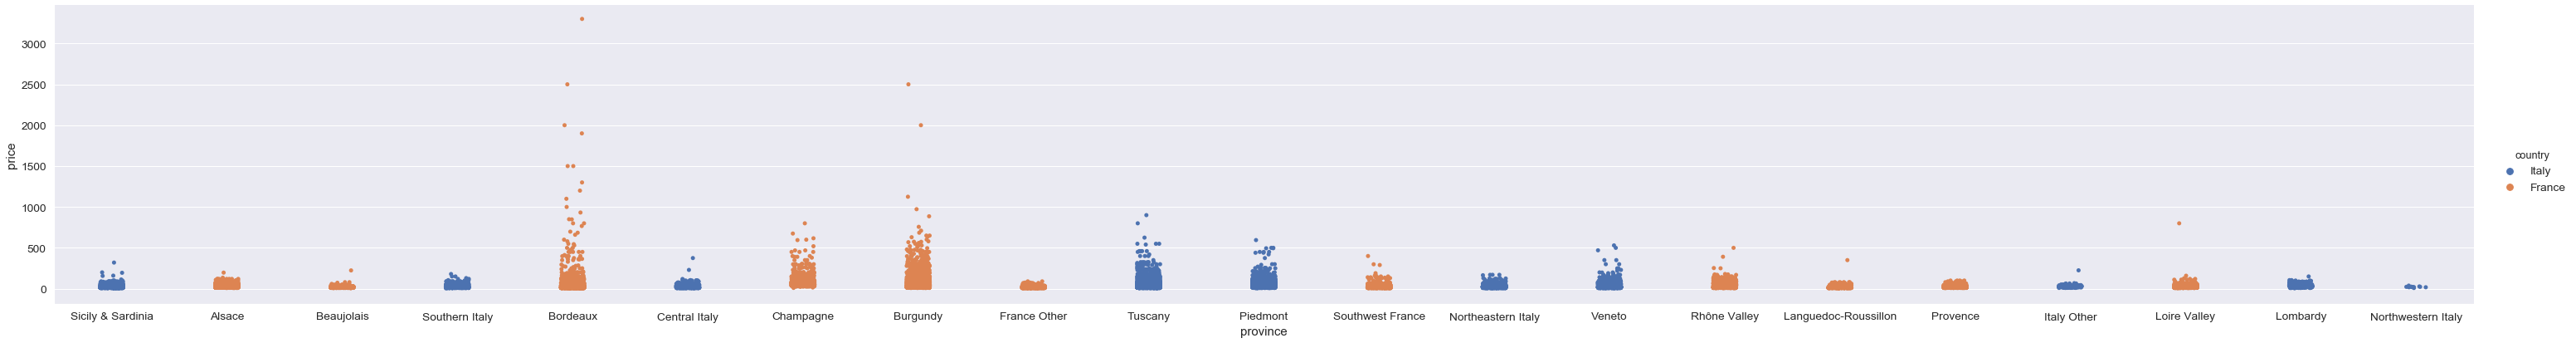

In [83]:
sns.catplot(y='price',x='province',hue='country',data=df_fr_It,kind='strip',height=6,aspect=7)

Thus from above plot we cans say that Bordeaux ,Burgundy province French wines are most expensive.From Italy Tuscany, Piedmont province are the province which generates the expensive wined from italy.

Lets now deep dive and check which region from above gives the expensive wines. 

In [84]:
df_prov=df[(df['province']=='Bordeaux')|(df['province']=='Burgundy')|(df['province']=='Tuscany')|(df['province']=='Piedmont')]

In [85]:
df_prov[(df_prov['province']=='Bordeaux')]['region_1']

53            Bordeaux Blanc
136            Saint-Émilion
290            Saint-Estèphe
316           Bordeaux Blanc
317           Bordeaux Blanc
                 ...        
129523    Lalande de Pomerol
129532                Graves
129547         Saint-Émilion
129548          Saint-Julien
129839                 Médoc
Name: region_1, Length: 5941, dtype: object

In [86]:
df_prov[(df_prov['province']=='Bordeaux')][['country','points','province','region_1','region_2','price']].sort_values(by='price',ascending=False).head(10)

,country,points,province,region_1,region_2,price
80290,France,88,Bordeaux,Médoc,NaN,3300.0
15840,France,96,Bordeaux,Pomerol,NaN,2500.0
65352,France,97,Bordeaux,Pomerol,NaN,2000.0
1558,France,98,Bordeaux,Margaux,NaN,1900.0
111753,France,100,Bordeaux,Pauillac,NaN,1500.0
111755,France,100,Bordeaux,Saint-Émilion,NaN,1500.0
1575,France,96,Bordeaux,Pauillac,NaN,1300.0
1571,France,96,Bordeaux,Pessac-Léognan,NaN,1200.0
1566,France,97,Bordeaux,Pessac-Léognan,NaN,1100.0
69516,France,94,Bordeaux,Pessac-Léognan,NaN,1000.0


Thus the most expensive wine comes from Medoc region which belongs to Bordeaux province. This is followed by Pomerol,Pauillac ,x
Pessac-Léognan 

In [87]:
df['region_2']=df['region_2'].astype(str)

In [88]:
df['region_2'].describe

<bound method NDFrame.describe of 0                       nan
1                       nan
2         Willamette Valley
3                       nan
4         Willamette Valley
                ...        
129966                  nan
129967         Oregon Other
129968                  nan
129969                  nan
129970                  nan
Name: region_2, Length: 129971, dtype: object>

In [89]:
df['region_2']=df['region_2'].replace('nan','No_Value')
df[df['region_2']!='No_Value']['region_2']

2         Willamette Valley
4         Willamette Valley
10                     Napa
12                   Sonoma
14            Central Coast
                ...        
129945        Central Coast
129949                 Napa
129950                 Napa
129952                 Napa
129967         Oregon Other
Name: region_2, Length: 50511, dtype: object

Thus out of 130K , region_2 is available only for 50K data.Let's see the region_2 which comes the most.'

In [90]:
df[df['region_2']!='No_Value']['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [91]:
df_reg2=df[df['region_2']!='No_Value']

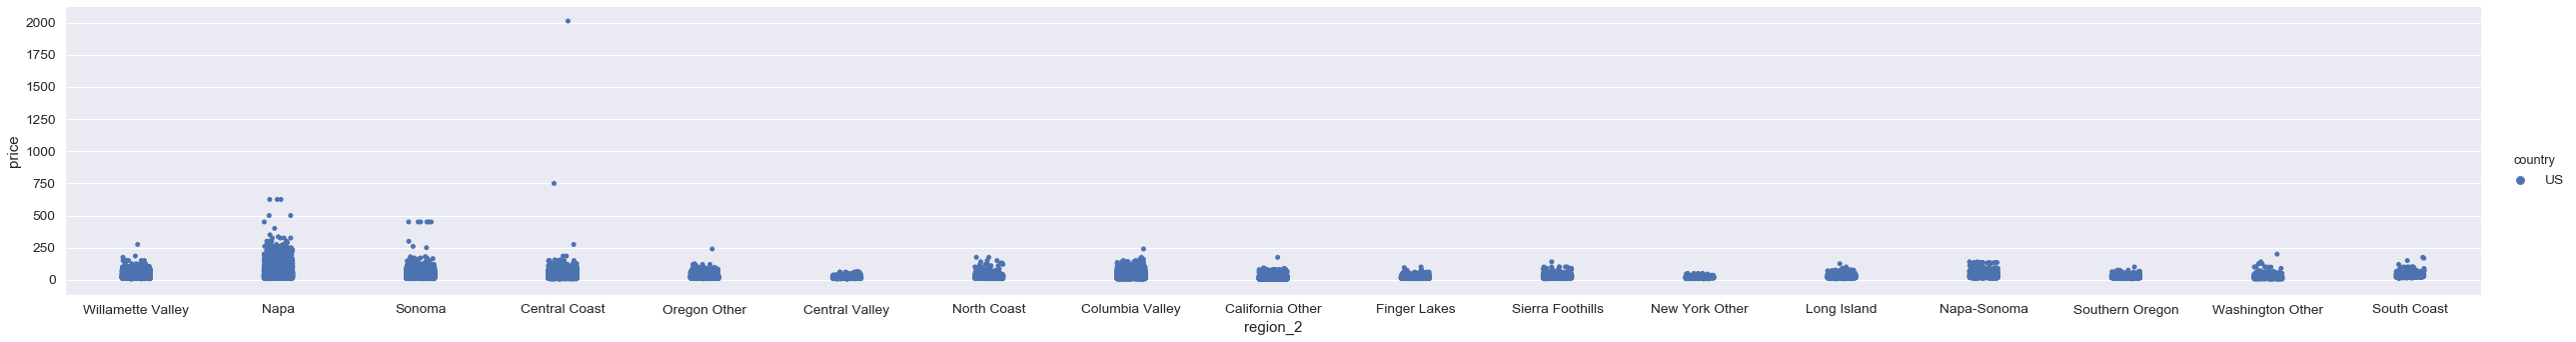

In [92]:
sns.catplot(x='region_2',y='price',hue='country',data=df_reg2,kind='strip',aspect=7,height=5)

In [93]:
df_reg2[df_reg2['region_2']=='Napa'][['province','region_1']]

,province,region_1
10,California,Napa Valley
55,California,Napa Valley
60,California,Napa Valley
73,California,Howell Mountain
74,California,Calistoga
...,...,...
129899,California,Napa Valley
129906,California,Napa Valley
129949,California,Napa Valley
129950,California,Napa Valley


That is quite intresting outcome, now we know region2 is only for US.And one region_1 can contain multiple region_2.

In [94]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# taster_name

In [95]:
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [96]:
df['taster_name']=df['taster_name'].astype(str)

In [97]:
df['taster_name']=df['taster_name'].replace('nan','no_name')

In [98]:
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', 'no_name', 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [99]:
df['taster_name'].nunique()

20

In [100]:
taster=df['taster_name'].unique().tolist()

In [101]:
df[df['taster_name']=='Kerin O’Keefe'][['taster_name','points']].sort_values(by='points',ascending=False).max()

taster_name    Kerin O’Keefe
points                   100
dtype: object

In [102]:
taster_max=pd.DataFrame([])
taster_min=pd.DataFrame([])
for i in taster:
    taster_pt=df[df['taster_name']==i][['taster_name','points']].sort_values(by='points',ascending=False).max()
    taster_max=taster_max.append(taster_pt,ignore_index=True)

for i in taster:
    taster_pt=df[df['taster_name']==i][['taster_name','points']].sort_values(by='points',ascending=False).min()
    taster_min=taster_min.append(taster_pt,ignore_index=True)
    

In [103]:
taster_max

,points,taster_name
0,100.0,Kerin O’Keefe
1,100.0,Roger Voss
2,100.0,Paul Gregutt
3,91.0,Alexander Peartree
4,98.0,Michael Schachner
5,98.0,Anna Lee C. Iijima
6,99.0,Virginie Boone
7,97.0,Matt Kettmann
8,100.0,no_name
9,97.0,Sean P. Sullivan


In [104]:
taster_min

,points,taster_name
0,80.0,Kerin O’Keefe
1,80.0,Roger Voss
2,80.0,Paul Gregutt
3,80.0,Alexander Peartree
4,80.0,Michael Schachner
5,80.0,Anna Lee C. Iijima
6,80.0,Virginie Boone
7,81.0,Matt Kettmann
8,80.0,no_name
9,80.0,Sean P. Sullivan


Above is the list of max and min points given by taster. 

In [105]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# taster_twitter_handle

In [106]:
df['taster_twitter_handle']=df['taster_twitter_handle'].astype(str)

In [107]:
df['taster_twitter_handle']=df['taster_twitter_handle'].replace('nan','No_id')

In [108]:
df[df['taster_twitter_handle']!='No_id']['taster_twitter_handle']

0         @kerinokeefe
1           @vossroger
2          @paulgwine 
4          @paulgwine 
5          @wineschach
              ...     
129965      @vossroger
129967     @paulgwine 
129968      @vossroger
129969      @vossroger
129970      @vossroger
Name: taster_twitter_handle, Length: 98758, dtype: object

# Title

In [109]:
df['title']

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [110]:
df['title']=df['title'].astype(str)

In [111]:
df['title'].isnull().sum()

0

We can find which wine title has maximum points and highest price. Doe high price means higer points, it must be why else a wine will be
expensive if it doesnt have any special qualities. 

In [112]:
df[['title','points','price']].sort_values(by='price',ascending=False).head(10)

,title,points,price
80290,Château les Ormes Sorbet 2013 Médoc,88,3300.0
15840,Château Pétrus 2014 Pomerol,96,2500.0
98380,Domaine du Comte Liger-Belair 2010 La Romanée,96,2500.0
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,91,2013.0
113564,Domaine du Comte Liger-Belair 2005 La Romanée,96,2000.0
65352,Château Pétrus 2011 Pomerol,97,2000.0
1558,Château Margaux 2009 Margaux,98,1900.0
111753,Château Lafite Rothschild 2010 Pauillac,100,1500.0
111755,Château Cheval Blanc 2010 Saint-Émilion,100,1500.0
1575,Château Mouton Rothschild 2009 Pauillac,96,1300.0


This is strange...The taster has given Château les Ormes Sorbet 2013 Médoc wine a point of 88 (12 less than 100)but its price 
is the highest among the sample. Why ..this is so expensive if it is not liked by the taster that much...May be taster personal choice
is coming into picture here...GOd Knows!!!

Lets check the cheapest wine which has got 100 points by taster.

In [113]:
df[df['points']==100][['title','points','price']].sort_values(by='price',ascending=True).head(10)

,title,points,price
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,100,80.0
113929,Charles Smith 2006 Royal City Syrah (Columbia ...,100,80.0
58352,Château Léoville Barton 2010 Saint-Julien,100,150.0
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),100,200.0
7335,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,100,210.0
89728,Louis Roederer 2008 Cristal Vintage Brut (Cha...,100,250.0
36528,Krug 2002 Brut (Champagne),100,259.0
111754,Casanova di Neri 2007 Cerretalto (Brunello di...,100,270.0
345,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,100,350.0
111756,Château Léoville Las Cases 2010 Saint-Julien,100,359.0


So the cheapest wine which has got 100 points from taster are Cayuse 2008 Bionic Frog Syrah andCharles Smith 2006 Royal City Syrah

In [114]:
df[df['title'].str.contains('Cayuse 2008 Bionic Frog Syrah')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse


In [115]:
df[df['title'].str.contains('Charles Smith 2006 Royal City Syrah')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith


So both the cheap wines are from Washington province of US and both had a common taster Paul Gregutt. Both the wines are made from same type of grapes Syrah and has same price and points.

In [116]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# VARIETY

In [117]:
df['variety']=df['variety'].astype(str)

In [118]:
df['variety'].isnull().sum()

0

In [119]:
var=pd.DataFrame(df['variety'].value_counts()).reset_index()
var.columns=['Variety','count']
var[var['count']>10]

,Variety,count
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
...,...,...
281,Black Muscat,11
282,Neuburger,11
283,Tinta Roriz,11
284,Refosco,11


In [120]:
var1=pd.DataFrame(df.groupby('variety')['points'].mean()).reset_index()
var1.columns=['Variety',"Mean_points"]
var3=var1.sort_values(by='Mean_points',ascending=False)
var3.head(10)

,Variety,Mean_points
610,Tinta del Pais,95.000000
208,Gelber Traminer,95.000000
597,Terrantez,95.000000
68,Bual,94.142857
480,Riesling-Chardonnay,94.000000
533,Sercial,94.000000
203,Garnacha-Cariñena,93.000000
54,Blauburgunder,93.000000
469,Ramisco,93.000000
500,Roviello,92.500000


In [121]:
var2=pd.DataFrame(df.groupby('variety')['price'].mean()).reset_index()
var2.columns=['Variety',"Mean_price"]
var4=var2.sort_values(by='Mean_price',ascending=False)
var4.head(10)
#var2.head(10)

,Variety,Mean_price
469,Ramisco,495.000000
597,Terrantez,236.000000
183,Francisa,160.000000
491,Rosenmuskateller,150.000000
283,Malbec-Cabernet,113.333333
607,Tinta Negra Mole,112.000000
366,Muscadelle,111.200000
68,Bual,100.000000
158,Debit,98.333333
93,Cabernet-Shiraz,83.500000


 As we have seen earlier price and points are not related. The mean_price is highest for Ramisco grapes whereas Tinta del Pais has 
received highest points.

In [122]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [123]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
corr
print(corr['price'])

Find most important features relative to target
price     1.000000
points    0.416167
Name: price, dtype: float64


thus this further shows less correlation between price and points

# WINERY

In [124]:
df['winery']=df['winery'].astype(str)
df['winery'].value_counts()

Wines & Winemakers             222
Testarossa                     218
DFJ Vinhos                     215
Williams Selyem                211
Louis Latour                   199
                              ... 
Château de Perligues             1
Cellar Marti Fabra Carreras      1
Domaine Fincham                  1
Château Montcabrier              1
Sorelli                          1
Name: winery, Length: 16757, dtype: int64

In [125]:
wine=pd.DataFrame(df['winery'].value_counts()).reset_index()
wine.columns=['Name','Winery_count']
wine.head(10)

,Name,Winery_count
0,Wines & Winemakers,222
1,Testarossa,218
2,DFJ Vinhos,215
3,Williams Selyem,211
4,Louis Latour,199
5,Georges Duboeuf,196
6,Chateau Ste. Michelle,194
7,Concha y Toro,164
8,Columbia Crest,159
9,Kendall-Jackson,130


In [126]:
df[df['winery']=='Wines & Winemakers'].sort_values(by='price',ascending=False).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
24950,Portugal,Properly almost black in color (as befits a wi...,Companhia das Lezirias 1836 Grande Reserva Tinto,90,77.0,Tejo,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2014 Companhia das Lezirias...,Alicante Bouschet,Wines & Winemakers
16165,Portugal,This fine low-production wood-aged wine is alm...,Companhia das Lezirias 1836 Grande Reserva Branco,93,77.0,Tejo,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2015 Companhia das Lezirias...,Fernão Pires,Wines & Winemakers
84614,Portugal,"Big in every sense, this powerful, almost blac...",Companhia das Lezirias 1836 Grande Reserva,93,77.0,Tejo,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2012 Companhia das Lezirias...,Portuguese Red,Wines & Winemakers
127527,Portugal,"As the name suggests, only 10 barrels of this ...",Nostalgia 10 Barricas,90,75.0,Vinho Verde,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2015 Nostalgia 10 Barricas ...,Alvarinho,Wines & Winemakers
61146,Portugal,"This is a seriously impressive, ripe and power...",Andreza Grande Reserva,91,55.0,Douro,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2013 Andreza Grande Reserva...,Portuguese Red,Wines & Winemakers
102948,Portugal,"A big, bold and ripe wine, this is rich and pa...",Pegos Claros Grand Escolha,91,40.0,Península de Setúbal,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2013 Pegos Claros Grand Esc...,Castelão,Wines & Winemakers
67175,Portugal,A powerful wine that has licorice and black co...,Pegos Claros Grande Escolha,92,40.0,Palmela,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2012 Pegos Claros Grande Es...,Portuguese Red,Wines & Winemakers
118234,Portugal,"Produced from old vines, this is a serious and...",Aguia Moura em Vinhas Velhas Garrafeira,91,40.0,Douro,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2011 Aguia Moura em Vinhas ...,Portuguese Red,Wines & Winemakers
102631,Portugal,All the warm southern heat of the Alentejo is ...,Azul Portugal Reserva,90,40.0,Alentejano,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2013 Azul Portugal Reserva ...,Portuguese Red,Wines & Winemakers
16164,Portugal,This 100% Touriga Nacional comes from the gove...,Companhia das Lezirias Tyto Alba,93,36.0,Tejo,No_Value,No_Value,Roger Voss,@vossroger,Wines & Winemakers 2014 Companhia das Lezirias...,Touriga Nacional,Wines & Winemakers


Wines & Winemakers are the winery which produces wines having high points and of cheap price(<$77).

In [127]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

Have an Provinces the same number of wines?

In [128]:
wine=pd.DataFrame(df.groupby('province')['title'].count()).reset_index()
wine.columns=['province','count_of_wines']
wine.sort_values(by='count_of_wines',ascending=False)

,province,count_of_wines
51,California,36247
411,Washington,8639
36,Bordeaux,5941
374,Tuscany,5897
268,Oregon,5373
...,...,...
271,Paardeberg,1
214,Mavrodaphne de Cephalonie,1
354,Table wine,1
119,Elazığ-Diyarbakir,1


This answer our question, that no each province has different number of wines count.

Whats the distribuition of Price and Points by Province?

In [129]:
dist_pr_max=df.groupby('province')['price'].max().reset_index()
dist_pt_max=df.groupby('province')['points'].max().reset_index()

In [130]:
dist_pr_min=df.groupby('province')['price'].min().reset_index()
dist_pt_min=df.groupby('province')['points'].min().reset_index()

In [132]:
dist_pr_min

,province,price
0,Achaia,13.0
1,Aconcagua Costa,13.0
2,Aconcagua Valley,5.0
3,Aegean,15.0
4,Agioritikos,22.0
...,...,...
420,Zenata,14.0
421,Österreichischer Perlwein,12.0
422,Österreichischer Sekt,15.0
423,Štajerska,11.0


In [133]:
dist1=pd.merge(dist_pr_max,dist_pt_max,on='province')
dist2=pd.merge(dist_pr_min,dist_pt_min,on='province')
dist=pd.merge(dist1,dist2,on='province')

In [134]:
dist

,province,price_x,points_x,price_y,points_y
0,Achaia,37.0,90,13.0,83
1,Aconcagua Costa,95.0,90,13.0,83
2,Aconcagua Valley,235.0,93,5.0,80
3,Aegean,120.0,92,15.0,86
4,Agioritikos,25.0,87,22.0,86
...,...,...,...,...,...
420,Zenata,18.0,93,14.0,85
421,Österreichischer Perlwein,21.0,87,12.0,85
422,Österreichischer Sekt,55.0,95,15.0,84
423,Štajerska,31.0,90,11.0,83


In [135]:
dist.columns=['province','price_max','points_max','price_min','points_min']
dist.head(10)

,province,price_max,points_max,price_min,points_min
0,Achaia,37.0,90,13.0,83
1,Aconcagua Costa,95.0,90,13.0,83
2,Aconcagua Valley,235.0,93,5.0,80
3,Aegean,120.0,92,15.0,86
4,Agioritikos,25.0,87,22.0,86
5,Ahr,125.0,93,28.0,86
6,Alenquer,14.0,90,8.0,85
7,Alentejano,158.0,95,5.0,81
8,Alentejo,275.0,97,7.0,82
9,Alenteo,18.0,88,18.0,88


In [136]:
# Let's get tehe price_log to better work with this feature
df['price_log'] = np.log(df['price'])


# Crossing prices and Points

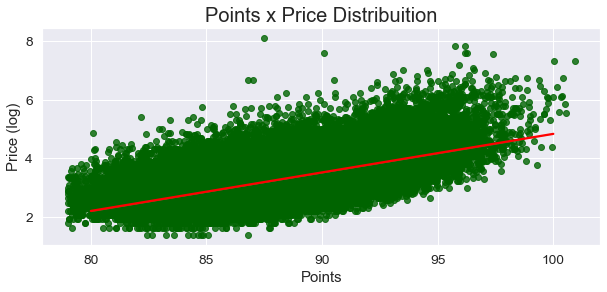

In [137]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

[Text(0, 0, 'Nicosia'),
 Text(0, 0, 'Quinta dos Avidagos'),
 Text(0, 0, 'Rainstorm'),
 Text(0, 0, 'St. Julian'),
 Text(0, 0, 'Sweet Cheeks'),
 Text(0, 0, 'Tandem'),
 Text(0, 0, 'Terre di Giurfo'),
 Text(0, 0, 'Trimbach'),
 Text(0, 0, 'Heinz Eifel'),
 Text(0, 0, 'Jean-Baptiste Adam'),
 Text(0, 0, 'Kirkland Signature'),
 Text(0, 0, 'Leon Beyer'),
 Text(0, 0, 'Louis M. Martini'),
 Text(0, 0, 'Masseria Setteporte'),
 Text(0, 0, 'Mirassou'),
 Text(0, 0, 'Richard Böcking'),
 Text(0, 0, 'Felix Lavaque'),
 Text(0, 0, 'Gaucho Andino'),
 Text(0, 0, 'Pradorey'),
 Text(0, 0, 'Quiévremont'),
 Text(0, 0, 'Acrobat'),
 Text(0, 0, 'Baglio di Pianetto'),
 Text(0, 0, 'Bianchi'),
 Text(0, 0, 'Canicattì'),
 Text(0, 0, 'Castello di Amorosa'),
 Text(0, 0, 'Stemmari'),
 Text(0, 0, 'Clarksburg Wine Company'),
 Text(0, 0, 'Domaine de la Madone'),
 Text(0, 0, 'Duca di Salaparuta'),
 Text(0, 0, 'Envolve'),
 Text(0, 0, 'Erath'),
 Text(0, 0, 'Estampa'),
 Text(0, 0, 'Feudi del Pisciotto'),
 Text(0, 0, 'Feudi di San 

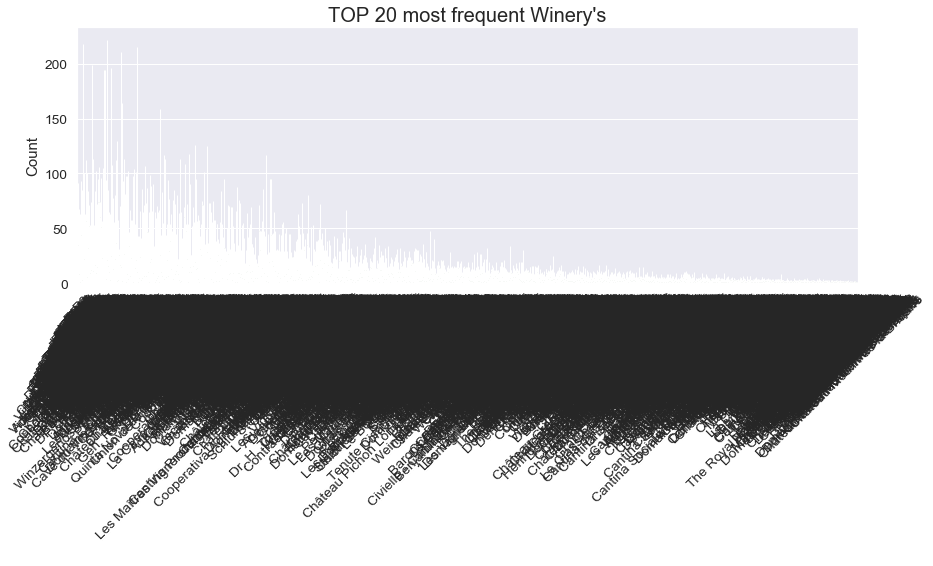

In [138]:
plt.figure(figsize=(14,16))

winery = df.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery', 
                  data=df, 
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [139]:
plt.show()

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))

<Figure size 1152x2016 with 0 Axes>

<Figure size 1152x2016 with 0 Axes>

In [142]:
df.country[:10]

0       Italy
1    Portugal
2          US
3          US
4          US
5       Spain
6       Italy
7      France
8     Germany
9      France
Name: country, dtype: object

MemoryError: Unable to allocate 22.7 GiB for an array with shape (54504, 55865) and data type float64

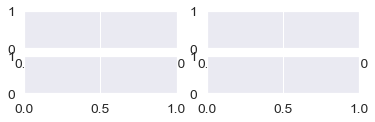

In [143]:
for n, cat in enumerate(df.country[:5]):
    
    ax = plt.subplot(grid[n]) 
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                 stop_words='english',
                                 max_df=.5) 
    X2 = vectorizer.fit_transform(df.loc[(df.country == cat)]['description']) 
    features = (vectorizer.get_feature_names()) 
    scores = (X2.toarray()) 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    

In [144]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = df.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emondsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


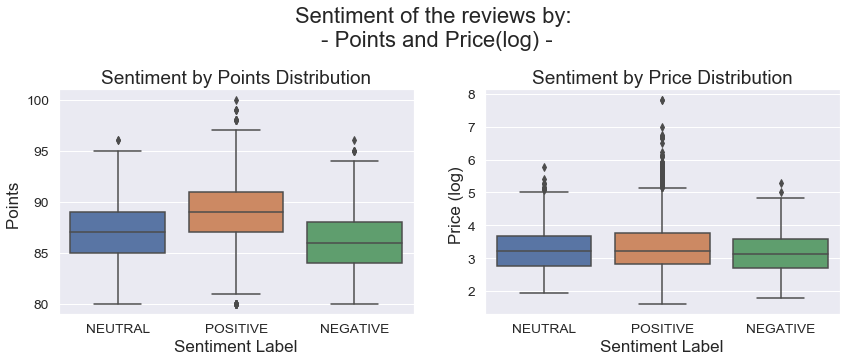

In [145]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

# Collabrative filtering

A small recommender system is made using Nearest Neighbors algorithm.

In [146]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [147]:
col = ['province','variety','points']

wine1 = df[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [148]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [177]:
wine_pivot

province,Achaia,Aconcagua Costa,Aconcagua Valley,Aegean,Agioritikos,Ahr,Alenquer,Alentejano,Alentejo,Alenteo,...,Wellington,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa
variety,,,,,,,,,,,,,,,,,,,,,
Abouriou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agiorgitiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albanello,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zlahtina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweigelt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
model_knn

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

Predict

In [176]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

0 134
Recmmendation for ## Debit ##:
1: Muscadine with distance: 0.2928932188134524
2: Carignane with distance: 0.2928932188134524
3: Black Monukka with distance: 0.2928932188134524
4: Sangiovese Cabernet with distance: 0.2928932188134524
5: Malbec-Syrah with distance: 0.2928932188134524


1 36
Recmmendation for ## Baga-Touriga Nacional ##:
1: Cerceal with distance: 0.1896188209554306
2: Touriga Nacional-Cabernet Sauvignon with distance: 0.2812190202268303
3: Cercial with distance: 0.2928932188134524
4: Maria Gomes-Bical with distance: 0.2928932188134524
5: Bical with distance: 0.2928932188134524


2 349
Recmmendation for ## Pallagrello Bianco ##:
1: Roviello with distance: 0.0
2: Bombino Nero with distance: 0.0
3: Tintilia  with distance: 0.0
4: Pallagrello Bianco with distance: 0.0
5: Caprettone with distance: 0.0


3 267
Recmmendation for ## Marsanne ##:
1: Cabernet Sauvignon-Sangiovese with distance: 0.252916228086544
2: Grenache-Mourvèdre with distance: 0.2854554967501951
3: Semil

In [174]:
query_index

140

In [179]:
distance

array([[0., 0., 0., 0., 0., 0.]])